In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

!pip install openpyxl

In [39]:
df = pd.read_excel('./Date_Fruit_Datasets.xlsx')

In [40]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    #mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #mi_scores = mi_scores.sort_values(ascending=False)

In [41]:
X=df.copy()
y=X.pop('Class')

y_MI=y.copy()

y_MI=y_MI.replace(regex={'BERHI': 1, 'DEGLET': 2,
              'DOKOL': 3, 'IRAQI': 4,
              'ROTANA': 5, 'SAFAVI': 6,
              'SOGAY': 7})

cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]
X_r=X.drop(cols_with_missing, axis=1)
nan_value = float("NaN")
X_r.replace(0, nan_value, inplace=True)
X_r.replace("", nan_value, inplace=True)
X_r.dropna(how='all', axis=1, inplace=True)

input_shape = [X.shape[1]]


In [42]:
train_X, val_X, train_y, val_y = train_test_split(X_r, y_MI, random_state = 0)

In [43]:
#Using normal Dense layers
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=8),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [44]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
6/6 [==============================] - 0s 48ms/step - loss: 1364330112.0000 - val_loss: 746590912.0000
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 463273600.0000 - val_loss: 271660096.0000
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 215676208.0000 - val_loss: 131622040.0000
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 147229856.0000 - val_loss: 210243680.0000
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 160921712.0000 - val_loss: 149379408.0000
Epoch 6/200
6/6 [==============================] - 0s 16ms/step - loss: 127041792.0000 - val_loss: 131460576.0000
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 105766392.0000 - val_loss: 71475272.0000
Epoch 8/200
6/6 [==============================] - 0s 14ms/step - loss: 81634480.0000 - val_loss: 74217712.0000
Epoch 9/200
6/6 [==============================] - 0s 15ms/step - loss: 78343088.0000 - va

6/6 [==============================] - 0s 14ms/step - loss: 2284223.2500 - val_loss: 2275581.2500
Epoch 75/200
6/6 [==============================] - 0s 12ms/step - loss: 2719276.5000 - val_loss: 3057266.2500
Epoch 76/200
6/6 [==============================] - 0s 11ms/step - loss: 3125523.5000 - val_loss: 3009502.5000
Epoch 77/200
6/6 [==============================] - 0s 11ms/step - loss: 3176048.0000 - val_loss: 3136953.5000
Epoch 78/200
6/6 [==============================] - 0s 13ms/step - loss: 2914997.5000 - val_loss: 2501082.7500
Epoch 79/200
6/6 [==============================] - 0s 11ms/step - loss: 2426489.2500 - val_loss: 2300599.0000
Epoch 80/200
6/6 [==============================] - 0s 11ms/step - loss: 2114499.2500 - val_loss: 1917833.5000
Epoch 81/200
6/6 [==============================] - 0s 12ms/step - loss: 1794908.3750 - val_loss: 1576742.6250
Epoch 82/200
6/6 [==============================] - 0s 12ms/step - loss: 2009028.8750 - val_loss: 1996206.6250
Epoch 83/200
6

Epoch 150/200
6/6 [==============================] - 0s 11ms/step - loss: 102.9265 - val_loss: 2971.2803
Epoch 151/200
6/6 [==============================] - 0s 18ms/step - loss: 69.0017 - val_loss: 2981.8147
Epoch 152/200
6/6 [==============================] - 0s 18ms/step - loss: 46.6446 - val_loss: 2995.5569
Epoch 153/200
6/6 [==============================] - 0s 14ms/step - loss: 30.5599 - val_loss: 3001.7961
Epoch 154/200
6/6 [==============================] - 0s 11ms/step - loss: 24.9009 - val_loss: 2995.1138
Epoch 155/200
6/6 [==============================] - 0s 12ms/step - loss: 22.5763 - val_loss: 2962.7183
Epoch 156/200
6/6 [==============================] - 0s 13ms/step - loss: 114.5568 - val_loss: 2954.3992
Epoch 157/200
6/6 [==============================] - 0s 13ms/step - loss: 138.6762 - val_loss: 2953.4397
Epoch 158/200
6/6 [==============================] - 0s 15ms/step - loss: 122.8073 - val_loss: 2965.4253
Epoch 159/200
6/6 [==============================] - 0s 13ms

In [45]:
history_dense = pd.DataFrame(history.history)


In [46]:
#Using normal Dense layers and dropout
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [47]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
6/6 [==============================] - 0s 56ms/step - loss: 3052483328.0000 - val_loss: 2231380992.0000
Epoch 2/200
6/6 [==============================] - 0s 19ms/step - loss: 1374727552.0000 - val_loss: 545619520.0000
Epoch 3/200
6/6 [==============================] - 0s 22ms/step - loss: 722983104.0000 - val_loss: 189789600.0000
Epoch 4/200
6/6 [==============================] - 0s 20ms/step - loss: 437549920.0000 - val_loss: 126473608.0000
Epoch 5/200
6/6 [==============================] - 0s 20ms/step - loss: 314926368.0000 - val_loss: 36630008.0000
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 245490048.0000 - val_loss: 26943840.0000
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 219549888.0000 - val_loss: 84422440.0000
Epoch 8/200
6/6 [==============================] - 0s 17ms/step - loss: 197296048.0000 - val_loss: 47854616.0000
Epoch 9/200
6/6 [==============================] - 0s 18ms/step - loss: 168502576.0000 - 

Epoch 78/200
6/6 [==============================] - 0s 14ms/step - loss: 161482.5469 - val_loss: 3.8899
Epoch 79/200
6/6 [==============================] - 0s 15ms/step - loss: 116069.1328 - val_loss: 3.8825
Epoch 80/200
6/6 [==============================] - 0s 20ms/step - loss: 256736.0000 - val_loss: 3.8751
Epoch 81/200
6/6 [==============================] - 0s 22ms/step - loss: 281265.0312 - val_loss: 3.8678
Epoch 82/200
6/6 [==============================] - 0s 17ms/step - loss: 228278.5625 - val_loss: 3.8605
Epoch 83/200
6/6 [==============================] - 0s 15ms/step - loss: 151296.8125 - val_loss: 3.8532
Epoch 84/200
6/6 [==============================] - 0s 14ms/step - loss: 65527.4336 - val_loss: 3.8459
Epoch 85/200
6/6 [==============================] - 0s 17ms/step - loss: 41105.7070 - val_loss: 3.8387
Epoch 86/200
6/6 [==============================] - 0s 20ms/step - loss: 138953.5469 - val_loss: 3.8315
Epoch 87/200
6/6 [==============================] - 0s 22ms/step -

6/6 [==============================] - 0s 14ms/step - loss: 53462.1523 - val_loss: 3.3580
Epoch 157/200
6/6 [==============================] - 0s 14ms/step - loss: 24710.1699 - val_loss: 3.3529
Epoch 158/200
6/6 [==============================] - 0s 16ms/step - loss: 1580.8162 - val_loss: 3.3480
Epoch 159/200
6/6 [==============================] - 0s 14ms/step - loss: 16043.8770 - val_loss: 3.3430
Epoch 160/200
6/6 [==============================] - 0s 14ms/step - loss: 14380.9805 - val_loss: 3.3382
Epoch 161/200
6/6 [==============================] - 0s 16ms/step - loss: 100378.9453 - val_loss: 3.3334
Epoch 162/200
6/6 [==============================] - 0s 15ms/step - loss: 49936.0195 - val_loss: 3.3287
Epoch 163/200
6/6 [==============================] - 0s 15ms/step - loss: 27293.4141 - val_loss: 3.3239
Epoch 164/200
6/6 [==============================] - 0s 14ms/step - loss: 31716.9180 - val_loss: 3.3191
Epoch 165/200
6/6 [==============================] - 0s 14ms/step - loss: 9548

In [48]:
history_DD = pd.DataFrame(history.history)


In [49]:
#Using normal Dense layers, dropout and batch normalization
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [50]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 0s 63ms/step - loss: 4.2296 - val_loss: 2.5144
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 4.0650 - val_loss: 1.9907
Epoch 3/200
6/6 [==============================] - 0s 19ms/step - loss: 3.8768 - val_loss: 3.4222
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 3.7299 - val_loss: 2.3596
Epoch 5/200
6/6 [==============================] - 0s 19ms/step - loss: 3.5264 - val_loss: 3.8720
Epoch 6/200
6/6 [=

6/6 [==============================] - 0s 18ms/step - loss: 0.7271 - val_loss: 0.6124
Epoch 77/200
6/6 [==============================] - 0s 15ms/step - loss: 0.7620 - val_loss: 0.6288
Epoch 78/200
6/6 [==============================] - 0s 16ms/step - loss: 0.7329 - val_loss: 0.9881
Epoch 79/200
6/6 [==============================] - 0s 19ms/step - loss: 0.7149 - val_loss: 1.7794
Epoch 80/200
6/6 [==============================] - 0s 18ms/step - loss: 0.7569 - val_loss: 1.1161
Epoch 81/200
6/6 [==============================] - 0s 19ms/step - loss: 0.7206 - val_loss: 0.9868
Epoch 82/200
6/6 [==============================] - 0s 18ms/step - loss: 0.6990 - val_loss: 1.4956
Epoch 83/200
6/6 [==============================] - 0s 17ms/step - loss: 0.6871 - val_loss: 1.6046
Epoch 84/200
6/6 [==============================] - 0s 18ms/step - loss: 0.6816 - val_loss: 1.5825
Epoch 85/200
6/6 [==============================] - 0s 22ms/step - loss: 0.6949 - val_loss: 1.2607
Epoch 86/200
6/6 [=====

6/6 [==============================] - 0s 17ms/step - loss: 0.4473 - val_loss: 1.7595
Epoch 159/200
6/6 [==============================] - 0s 18ms/step - loss: 0.4296 - val_loss: 1.7196
Epoch 160/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4441 - val_loss: 1.8487
Epoch 161/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4065 - val_loss: 2.1906
Epoch 162/200
6/6 [==============================] - 0s 18ms/step - loss: 0.4406 - val_loss: 1.8459
Epoch 163/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4345 - val_loss: 2.3376
Epoch 164/200
6/6 [==============================] - 0s 17ms/step - loss: 0.4314 - val_loss: 2.2185
Epoch 165/200
6/6 [==============================] - 0s 17ms/step - loss: 0.4308 - val_loss: 2.1326
Epoch 166/200
6/6 [==============================] - 0s 17ms/step - loss: 0.4329 - val_loss: 2.6987
Epoch 167/200
6/6 [==============================] - 0s 18ms/step - loss: 0.4299 - val_loss: 2.7180
Epoch 168/200


In [51]:
history_DDB = pd.DataFrame(history.history)

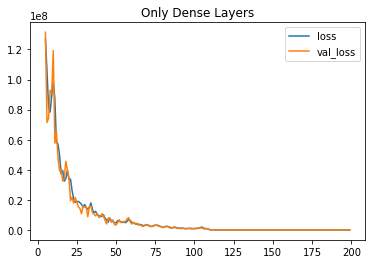

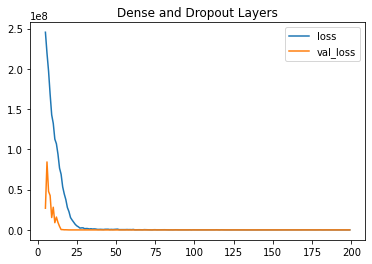

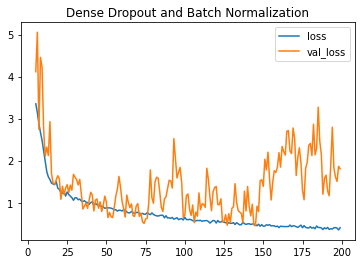

In [52]:
history_dense.loc[5:, ['loss','val_loss']].plot(title="Only Dense Layers");
history_DD.loc[5:, ['loss','val_loss']].plot(title="Dense and Dropout Layers");
history_DDB.loc[5:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization");

